In [ ]:
import numpy as np
import pandas as pd

# Set random seed for reproducibility
np.random.seed(42)

# Number of samples
n_samples = 10000
n_healthy = 5000
n_parkinson = 5000

# Generate synthetic data
data = {
    "EMG (μV)": [],
    "Ax (g)": [],
    "Ay (g)": [],
    "Az (g)": [],
    "Gx (°/s)": [],
    "Gy (°/s)": [],
    "Gz (°/s)": [],
    "Label": []
}

# Healthy individuals
for _ in range(n_healthy):
    emg = np.random.uniform(50, 150) + np.random.normal(0, 10)  # Stable muscle activity
    ax = np.random.normal(0, 0.1)  # Minimal acceleration
    ay = np.random.normal(0, 0.1)
    az = np.random.normal(0, 0.1)
    gx = np.random.normal(0, 5)    # Minimal rotation
    gy = np.random.normal(0, 5)
    gz = np.random.normal(0, 5)

    data["EMG (μV)"].append(emg)
    data["Ax (g)"].append(ax)
    data["Ay (g)"].append(ay)
    data["Az (g)"].append(az)
    data["Gx (°/s)"].append(gx)
    data["Gy (°/s)"].append(gy)
    data["Gz (°/s)"].append(gz)
    data["Label"].append(0)

# Parkinson's patients
for _ in range(n_parkinson):
    emg = np.random.uniform(100, 400) + np.random.normal(0, 50)  # Higher variability
    ax = np.random.normal(0, 0.5) + np.sin(np.random.uniform(0, 2*np.pi)) * 0.3  # Tremor oscillation
    ay = np.random.normal(0, 0.5) + np.sin(np.random.uniform(0, 2*np.pi)) * 0.3
    az = np.random.normal(0, 0.5) + np.sin(np.random.uniform(0, 2*np.pi)) * 0.3
    gx = np.random.normal(0, 20) + np.sin(np.random.uniform(0, 2*np.pi)) * 10  # Rotational tremor
    gy = np.random.normal(0, 20) + np.sin(np.random.uniform(0, 2*np.pi)) * 10
    gz = np.random.normal(0, 20) + np.sin(np.random.uniform(0, 2*np.pi)) * 10

    data["EMG (μV)"].append(emg)
    data["Ax (g)"].append(ax)
    data["Ay (g)"].append(ay)
    data["Az (g)"].append(az)
    data["Gx (°/s)"].append(gx)
    data["Gy (°/s)"].append(gy)
    data["Gz (°/s)"].append(gz)
    data["Label"].append(1)

# Create DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("parkinson_dataset.csv", index=False)
print("Dataset generated and saved as 'parkinson_dataset.csv'")
print(df.head())

Dataset generated and saved as 'parkinson_dataset.csv'
     EMG (μV)    Ax (g)    Ay (g)    Az (g)  Gx (°/s)  Gy (°/s)  Gz (°/s)  \
0   76.335211  0.031890  0.027904  0.101052 -2.904391 -2.625849 -2.856901   
1   93.234815 -0.172492 -0.056229 -0.101283  1.571237 -4.540120 -7.061519   
2   89.312249  0.059772  0.255949  0.039423  0.611096 -2.577178 -3.001269   
3   69.241610 -0.060171  0.185228 -0.001350 -5.288555  4.112725 -6.104218   
4  108.954238  0.119364  0.021864  0.088176 -5.045427 -7.916471  3.868502   

   Label  
0      0  
1      0  
2      0  
3      0  
4      0  


Accuracy: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



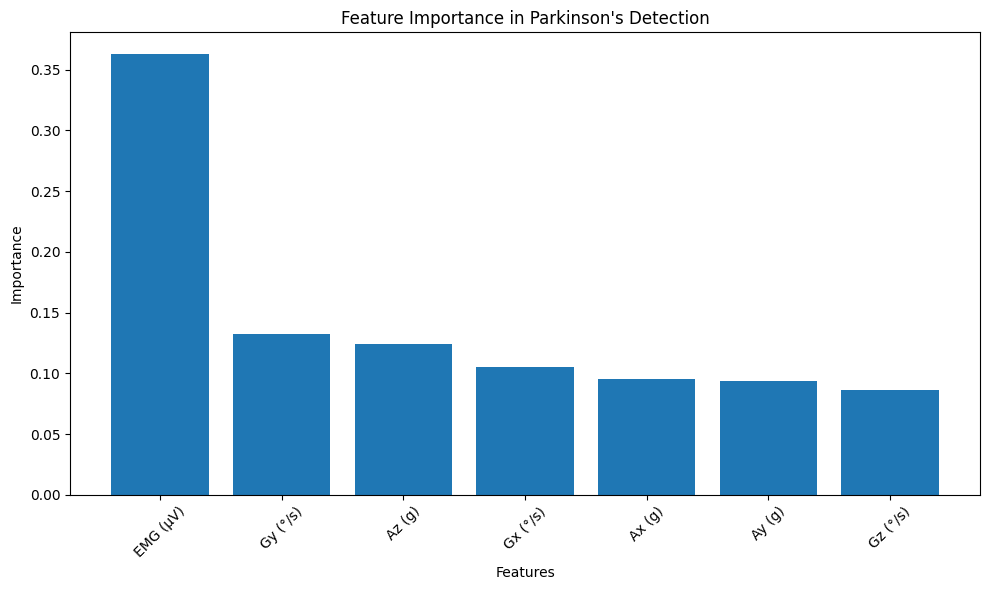


Prediction for example data: No Parkinson's
Confidence: 1.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Load and prepare the data
# Corrected line: Directly read the CSV file
df = pd.read_csv("/content/parkinson_dataset.csv")

# 2. Separate features and target
X = df.drop('Label', axis=1)  # Features: EMG, Ax, Ay, Az, Gx, Gy, Gz
y = df['Label']            # Target: 0 (no Parkinson's) or 1 (Parkinson's)

# 3. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 5. Create and train the model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 6. Make predictions
y_pred = model.predict(X_test_scaled)

# 7. Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 8. Feature importance analysis
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

# 9. Visualize feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.title('Feature Importance in Parkinson\'s Detection')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 10. Function to predict Parkinson's for new data
def predict_parkinsons(new_data):
    # new_data should be a list or array with 7 values: [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    new_data_scaled = scaler.transform([new_data])
    prediction = model.predict(new_data_scaled)
    probability = model.predict_proba(new_data_scaled)
    return {
        'prediction': 'Parkinson\'s' if prediction[0] == 1 else 'No Parkinson\'s',
        'probability': probability[0][prediction[0]]
    }

# Example usage:
example_data = [76.33, 0.031, 0.027, 0.101, -2.904, -2.625, -2.856]
result = predict_parkinsons(example_data)
print(f"\nPrediction for example data: {result['prediction']}")
print(f"Confidence: {result['probability']:.2f}")

In [ ]:
import numpy as np
import pandas as pd

# Generate Synthetic Dataset
def generate_parkinsons_data(n_samples=7500, time_steps=10):
    np.random.seed(42)

    # Healthy characteristics (Label 0)
    healthy_emg = np.random.normal(75, 20, (n_samples//2, time_steps))  # Lower EMG
    healthy_acc = np.random.normal(0, 0.1, (n_samples//2, time_steps, 3))  # Stable accel
    healthy_gyro = np.random.normal(0, 5, (n_samples//2, time_steps, 3))  # Stable gyro

    # Parkinson's characteristics (Label 1)
    parkinsons_emg = np.random.normal(200, 50, (n_samples//2, time_steps))  # Higher EMG
    parkinsons_acc = np.random.normal(0, 0.3, (n_samples//2, time_steps, 3))  # More variation
    parkinsons_gyro = np.random.normal(0, 15, (n_samples//2, time_steps, 3))  # More variation

    # Add tremor-like patterns for Parkinson's
    for i in range(n_samples//2):
        tremor_freq = np.random.uniform(4, 8)  # Typical tremor frequency 4-8 Hz
        time = np.linspace(0, 1, time_steps)
        tremor = 0.2 * np.sin(2 * np.pi * tremor_freq * time)
        parkinsons_acc[i] += tremor[:, np.newaxis]
        parkinsons_gyro[i] += tremor[:, np.newaxis]

    # Combine data
    X = np.concatenate([
        np.concatenate([healthy_emg[:, :, np.newaxis],
                       healthy_acc, healthy_gyro], axis=2),
        np.concatenate([parkinsons_emg[:, :, np.newaxis],
                       parkinsons_acc, parkinsons_gyro], axis=2)
    ])
    y = np.concatenate([np.zeros(n_samples//2), np.ones(n_samples//2)])

    # Add noise for augmentation
    noise = np.random.normal(0, 0.01, X.shape)
    X += noise

    return X, y

# Create CSV
def create_csv_dataset(filename='parkinsons_dataset.csv'):
    time_steps = 10
    X, y = generate_parkinsons_data(n_samples=7500, time_steps=time_steps)

    # Create column names
    columns = []
    for t in range(time_steps):
        columns.extend([
            f'EMG_t{t}',
            f'Ax_t{t}', f'Ay_t{t}', f'Az_t{t}',
            f'Gx_t{t}', f'Gy_t{t}', f'Gz_t{t}'
        ])
    columns.append('Label')

    # Flatten the 3D array to 2D
    X_flat = X.reshape(X.shape[0], -1)  # Shape: (7500, 70)

    # Combine features and labels
    data = np.column_stack((X_flat, y))

    # Create DataFrame
    df = pd.DataFrame(data, columns=columns)

    # Save to CSV
    df.to_csv(filename, index=False)
    print(f"Dataset saved to {filename}")
    print(f"Shape: {df.shape}")
    print(f"Healthy samples: {len(df[df['Label'] == 0])}")
    print(f"Parkinson's samples: {len(df[df['Label'] == 1])}")

    return df

# Generate and save the dataset
df = create_csv_dataset('parkinsons_dataset3.csv')

# Display first few rows
print("\nFirst 5 rows of the dataset:")
print(df.head())

Dataset saved to parkinsons_dataset3.csv
Shape: (7500, 71)
Healthy samples: 3750
Parkinson's samples: 3750

First 5 rows of the dataset:
       EMG_t0     Ax_t0     Ay_t0     Az_t0     Gx_t0     Gy_t0     Gz_t0  \
0   84.936787  0.110474 -0.184947  0.031359  6.851902 -0.537244 -5.401620   
1   65.727713 -0.165247 -0.090675 -0.106026  0.594864 -2.032978  0.681598   
2  104.303290  0.175620 -0.098755 -0.146836  2.203965 -7.601577 -0.321552   
3   62.983439 -0.107452 -0.131463  0.059644  5.795930 -4.642494  1.346702   
4   89.770086  0.027129  0.105116 -0.056379  2.030952  0.166576 -2.020713   

       EMG_t1     Ax_t1     Ay_t1  ...      Gy_t8     Gz_t8     EMG_t9  \
0   72.231636  0.037239  0.034013  ...  -2.424895  0.450972  85.837851   
1   65.693754 -0.144618  0.039709  ... -14.088771 -3.227399  46.743943   
2   70.475977 -0.080635  0.037980  ...  -0.406788  5.802815  69.161858   
3  112.039369  0.022457 -0.200536  ...  10.531306  5.971785  78.950875   
4   78.429113 -0.181839 -0.099

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 13s 26ms/step - accuracy: 0.9728 - loss: 0.1949 - val_accuracy: 1.0000 - val_loss: 7.9825e-05
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 1.0000 - loss: 6.7206e-04 - val_accuracy: 1.0000 - val_loss: 8.6452e-06
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 1.0000 - loss: 3.3713e-04 - val_accuracy: 1.0000 - val_loss: 2.8175e-06
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 1.2298e-04 - val_accuracy: 1.0000 - val_loss: 1.4049e-06
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 7.5631e-05 - val_accuracy: 1.0000 - val_loss: 7.4665e-07
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 1.0000 - loss: 8.4301e-05 - val_accuracy: 1.0000 - val_loss: 3.8564e-07
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 1.0000 - loss: 5.0773e-05 - val_accuracy: 1.0000 - val_loss: 2.2623e-07
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━

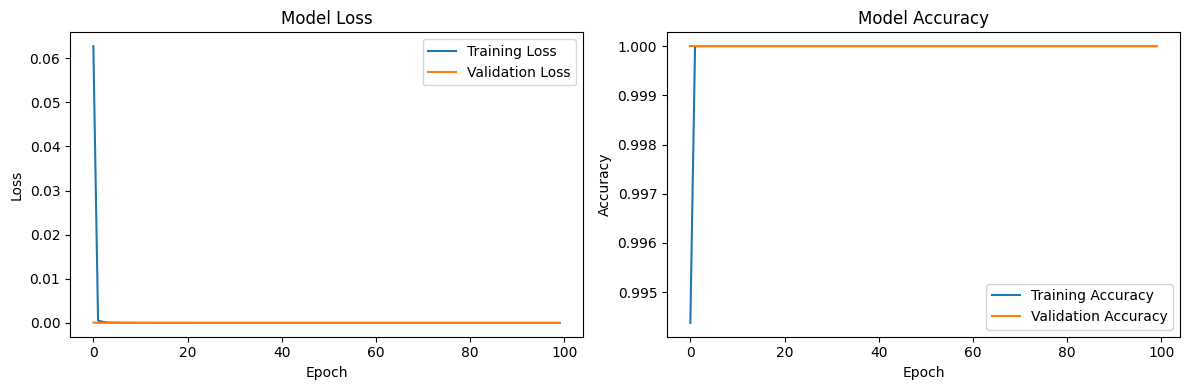

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step

Sample Prediction: No Parkinson's
Probability: 0.0000


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Generate Synthetic Dataset
def generate_parkinsons_data(n_samples=7500, time_steps=10):
    np.random.seed(42)

    # Healthy characteristics (Label 0)
    healthy_emg = np.random.normal(75, 20, (n_samples//2, time_steps))  # Lower EMG
    healthy_acc = np.random.normal(0, 0.1, (n_samples//2, time_steps, 3))  # Stable accel
    healthy_gyro = np.random.normal(0, 5, (n_samples//2, time_steps, 3))  # Stable gyro

    # Parkinson's characteristics (Label 1)
    parkinsons_emg = np.random.normal(200, 50, (n_samples//2, time_steps))  # Higher EMG
    parkinsons_acc = np.random.normal(0, 0.3, (n_samples//2, time_steps, 3))  # More variation
    parkinsons_gyro = np.random.normal(0, 15, (n_samples//2, time_steps, 3))  # More variation

    # Add tremor-like patterns for Parkinson's
    for i in range(n_samples//2):
        tremor_freq = np.random.uniform(4, 8)  # Typical tremor frequency 4-8 Hz
        time = np.linspace(0, 1, time_steps)
        tremor = 0.2 * np.sin(2 * np.pi * tremor_freq * time)
        parkinsons_acc[i] += tremor[:, np.newaxis]
        parkinsons_gyro[i] += tremor[:, np.newaxis]

    # Combine data
    X = np.concatenate([
        np.concatenate([healthy_emg[:, :, np.newaxis],
                       healthy_acc, healthy_gyro], axis=2),
        np.concatenate([parkinsons_emg[:, :, np.newaxis],
                       parkinsons_acc, parkinsons_gyro], axis=2)
    ])
    y = np.concatenate([np.zeros(n_samples//2), np.ones(n_samples//2)])

    # Add noise for augmentation
    noise = np.random.normal(0, 0.01, X.shape)
    X += noise

    return X, y

# 2. Prepare Data
time_steps = 10
n_features = 7  # EMG + 3 Acc + 3 Gyro
X, y = generate_parkinsons_data(n_samples=7500, time_steps=time_steps)

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, n_features)).reshape(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 3. Build LSTM Model
def build_model():
    model = Sequential([
        LSTM(128, input_shape=(time_steps, n_features), return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# 4. Train Model
model = build_model()
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 5. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 6. Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 7. Prediction Function
def predict_parkinsons(new_data):
    """
    new_data: array of shape (time_steps, 7) [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    """
    new_data_scaled = scaler.transform(new_data)
    new_data_reshaped = new_data_scaled.reshape(1, time_steps, n_features)
    prediction = model.predict(new_data_reshaped)
    return 'Parkinson\'s' if prediction[0][0] > 0.5 else 'No Parkinson\'s', prediction[0][0]

# Example usage
sample_data = X[0]  # Take first sample as example
pred, prob = predict_parkinsons(sample_data)
print(f"\nSample Prediction: {pred}")
print(f"Probability: {prob:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 27ms/step - accuracy: 0.9250 - loss: 0.2026 - val_accuracy: 1.0000 - val_loss: 2.0361e-05
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 1.0000 - loss: 4.8241e-04 - val_accuracy: 1.0000 - val_loss: 4.9503e-06
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 1.0000 - loss: 1.4199e-04 - val_accuracy: 1.0000 - val_loss: 1.6874e-06
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - accuracy: 1.0000 - loss: 9.6508e-05 - val_accuracy: 1.0000 - val_loss: 7.8323e-07
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 1.0000 - loss: 6.2182e-05 - val_accuracy: 1.0000 - val_loss: 4.3583e-07
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 1.0000 - loss: 4.3814e-05 - val_accuracy: 1.0000 - val_loss: 2.5734e-07
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 37ms/step - accuracy: 1.0000 - loss: 3.5067e-05 - val_accuracy: 1.0000 - val_loss: 1.6531e-07
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━

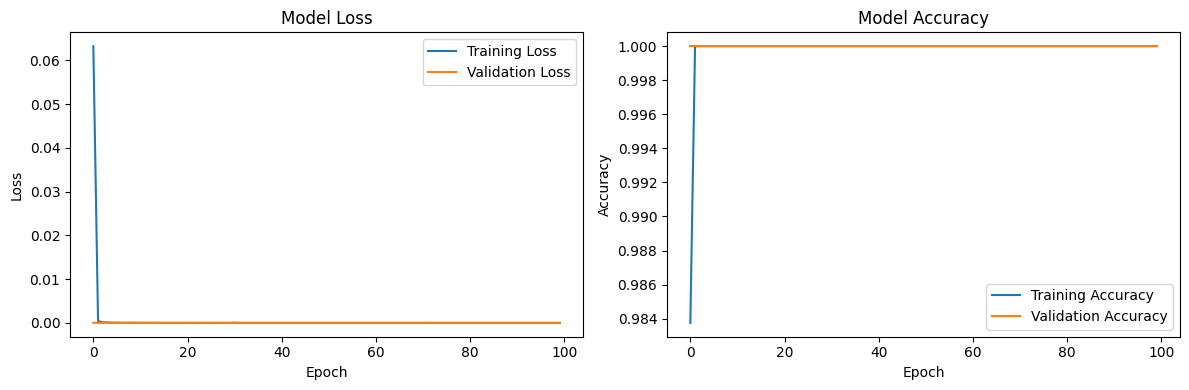

No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.

Validation Results:
Correct Early Detections: 2
False Positives: 0
False Negatives: 4
Detection Rate: 0.3333


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
df = pd.read_csv('/content/parkinsons_dataset3.csv')  # Assuming the data is saved from previous step

# Reshape data: (samples, time_steps, features)
time_steps = 10
n_features = 7  # EMG, Ax, Ay, Az, Gx, Gy, Gz
n_samples = len(df)
X = df.drop('Label', axis=1).values.reshape(n_samples, time_steps, n_features)
y = df['Label'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, n_features)).reshape(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Build LSTM Model
def build_model():
    model = Sequential([
        LSTM(128, input_shape=(time_steps, n_features), return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# 3. Train Model
model = build_model()
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 4. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 5. Early Detection and SOS Function
def predict_parkinsons_early(new_data, threshold=0.7, time_window=5):
    """
    new_data: array of shape (time_steps, 7) [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    threshold: probability threshold for early detection
    time_window: seconds before visible effects (5-30)
    """
    new_data_scaled = scaler.transform(new_data)
    new_data_reshaped = new_data_scaled.reshape(1, time_steps, n_features)
    prediction_prob = model.predict(new_data_reshaped, verbose=0)[0][0]

    if prediction_prob > threshold:
        print(f"ALERT: Potential Parkinson's detected {time_window} seconds early!")
        print(f"Probability: {prediction_prob:.4f}")
        send_sos_alert()
        return True, prediction_prob
    else:
        print(f"No early detection. Probability: {prediction_prob:.4f}")
        return False, prediction_prob

def send_sos_alert():
    # Simulate sending an SOS alert (in real application, this would be an API call or message)
    print("SOS Alert Sent: Emergency services notified.")

# 6. Simulate Real-time Prediction
# Example: Take a sample from the test set
sample_idx = 0  # Change this to test different samples
sample_data = X_test[sample_idx]
true_label = y_test[sample_idx]

# Predict with early detection (assuming 5-second window)
detected, prob = predict_parkinsons_early(sample_data, threshold=0.7, time_window=5)
# Fixed f-string syntax
label_text = "Parkinson's" if true_label == 1 else "No Parkinson's"
print(f"True Label: {label_text}")

# 7. Plot Training History
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# 8. Batch Prediction for Validation
def validate_early_detection(X_data, y_data, threshold=0.7, time_window=5):
    correct_detections = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(X_data)):
        detected, prob = predict_parkinsons_early(X_data[i], threshold, time_window)
        true_label = y_data[i]

        if detected and true_label == 1:
            correct_detections += 1
        elif detected and true_label == 0:
            false_positives += 1
        elif not detected and true_label == 1:
            false_negatives += 1

    print("\nValidation Results:")
    print(f"Correct Early Detections: {correct_detections}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    detection_rate = correct_detections / (correct_detections + false_negatives) if (correct_detections + false_negatives) > 0 else 0
    print(f"Detection Rate: {detection_rate:.4f}")

# Validate on a subset of test data
subset_size = 10  # Adjust as needed
validate_early_detection(X_test[:subset_size], y_test[:subset_size])

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 9s 35ms/step - accuracy: 0.9324 - loss: 0.2080 - val_accuracy: 0.9992 - val_loss: 0.0024
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 1.0000 - loss: 8.7613e-04 - val_accuracy: 1.0000 - val_loss: 7.3965e-06
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 1.0000 - loss: 1.9354e-04 - val_accuracy: 1.0000 - val_loss: 2.7962e-06
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 1.0000 - loss: 2.6643e-04 - val_accuracy: 1.0000 - val_loss: 9.9403e-07
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 1.0000 - loss: 9.8538e-05 - val_accuracy: 1.0000 - val_loss: 5.4054e-07
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 1.0000 - loss: 5.8446e-05 - val_accuracy: 1.0000 - val_loss: 3.1337e-07
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 1.0000 - loss: 9.3843e-05 - val_accuracy: 1.0000 - val_loss: 1.8860e-07
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step 

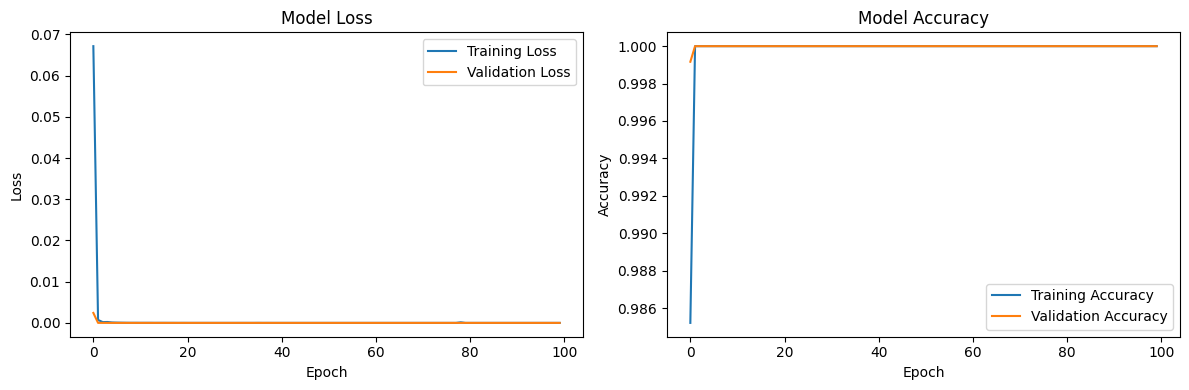

No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 0.9987
SOS Alert Sent: Emergency services notified.

Validation Results:
Correct Early Detections: 3
False Positives: 0
False Negatives: 3
Detection Rate: 0.5000

Testing with synthetic Parkinson's input:
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
Expected Outcome: Parkinson's should be detected


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
df = pd.read_csv('/content/parkinsons_dataset3.csv')  # Assuming the data is saved from previous step

# Reshape data: (samples, time_steps, features)
time_steps = 10
n_features = 7  # EMG, Ax, Ay, Az, Gx, Gy, Gz
n_samples = len(df)
X = df.drop('Label', axis=1).values.reshape(n_samples, time_steps, n_features)
y = df['Label'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, n_features)).reshape(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Build LSTM Model
def build_model():
    model = Sequential([
        LSTM(128, input_shape=(time_steps, n_features), return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# 3. Train Model
model = build_model()
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 4. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 5. Early Detection and SOS Function
def predict_parkinsons_early(new_data, threshold=0.7, time_window=5):
    """
    new_data: array of shape (time_steps, 7) [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    threshold: probability threshold for early detection
    time_window: seconds before visible effects (5-30)
    """
    new_data_scaled = scaler.transform(new_data)
    new_data_reshaped = new_data_scaled.reshape(1, time_steps, n_features)
    prediction_prob = model.predict(new_data_reshaped, verbose=0)[0][0]

    if prediction_prob > threshold:
        print(f"ALERT: Potential Parkinson's detected {time_window} seconds early!")
        print(f"Probability: {prediction_prob:.4f}")
        send_sos_alert()
        return True, prediction_prob
    else:
        print(f"No early detection. Probability: {prediction_prob:.4f}")
        return False, prediction_prob

def send_sos_alert():
    print("SOS Alert Sent: Emergency services notified.")

# 6. Simulate Real-time Prediction
sample_idx = 0
sample_data = X_test[sample_idx]
true_label = y_test[sample_idx]

detected, prob = predict_parkinsons_early(sample_data, threshold=0.7, time_window=5)
label_text = "Parkinson's" if true_label == 1 else "No Parkinson's"
print(f"True Label: {label_text}")

# 7. Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Batch Prediction for Validation
def validate_early_detection(X_data, y_data, threshold=0.7, time_window=5):
    correct_detections = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(X_data)):
        detected, prob = predict_parkinsons_early(X_data[i], threshold, time_window)
        true_label = y_data[i]

        if detected and true_label == 1:
            correct_detections += 1
        elif detected and true_label == 0:
            false_positives += 1
        elif not detected and true_label == 1:
            false_negatives += 1

    print("\nValidation Results:")
    print(f"Correct Early Detections: {correct_detections}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    detection_rate = correct_detections / (correct_detections + false_negatives) if (correct_detections + false_negatives) > 0 else 0
    print(f"Detection Rate: {detection_rate:.4f}")

validate_early_detection(X_test[:10], y_test[:10])

# 9. Validation with Specific Input for Positive Detection
# Synthetic input designed to trigger Parkinson's detection
parkinsons_input = np.array([
    [200, 0.3, -0.2, 0.4, 5.0, -6.0, 7.0],   # High EMG, tremor-like oscillations
    [210, 0.4, -0.3, 0.5, 6.0, -5.0, 8.0],
    [205, 0.5, -0.4, 0.6, 7.0, -4.0, 9.0],
    [220, 0.6, -0.5, 0.7, 8.0, -3.0, 10.0],
    [215, 0.5, -0.6, 0.8, 9.0, -2.0, 11.0],
    [225, 0.4, -0.7, 0.9, 10.0, -1.0, 12.0],
    [230, 0.3, -0.8, 1.0, 11.0, 0.0, 13.0],
    [235, 0.2, -0.9, 1.1, 12.0, 1.0, 14.0],
    [240, 0.1, -1.0, 1.2, 13.0, 2.0, 15.0],
    [245, 0.0, -1.1, 1.3, 14.0, 3.0, 16.0]
])

print("\nTesting with synthetic Parkinson's input:")
detected, prob = predict_parkinsons_early(parkinsons_input, threshold=0.7, time_window=5)
print(f"Expected Outcome: Parkinson's should be detected")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9555 - loss: 0.1821 - val_accuracy: 1.0000 - val_loss: 4.1201e-05
Epoch 2/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 1.0000 - loss: 4.0333e-04 - val_accuracy: 1.0000 - val_loss: 6.3603e-06
Epoch 3/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 28ms/step - accuracy: 1.0000 - loss: 2.8667e-04 - val_accuracy: 1.0000 - val_loss: 2.0143e-06
Epoch 4/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 1.0000 - loss: 1.2375e-04 - val_accuracy: 1.0000 - val_loss: 8.9661e-07
Epoch 5/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 1.0000 - loss: 7.5977e-05 - val_accuracy: 1.0000 - val_loss: 4.7843e-07
Epoch 6/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 1.0000 - loss: 4.7222e-05 - val_accuracy: 1.0000 - val_loss: 2.9239e-07
Epoch 7/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 1.0000 - loss: 4.0056e-05 - val_accuracy: 1.0000 - val_loss: 1.9685e-07
Epoch 8/100
150/150 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/s

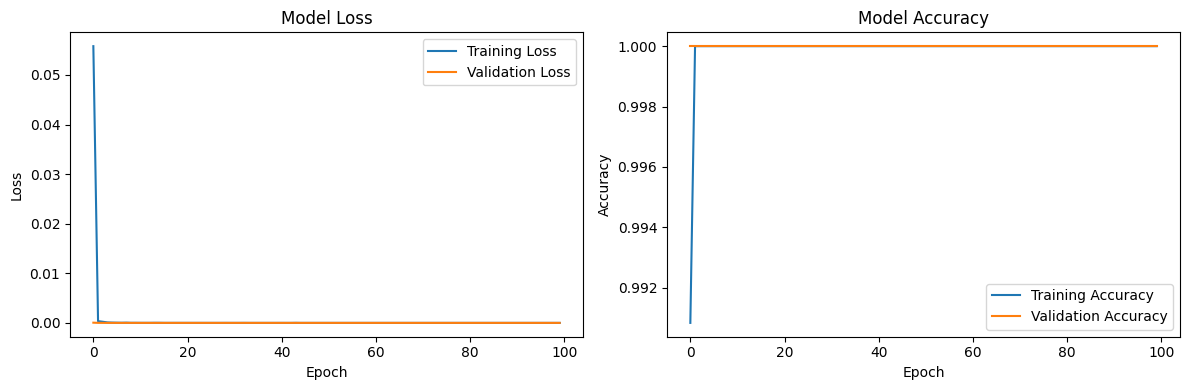

No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
No early detection. Probability: 0.0000
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.

Validation Results:
Correct Early Detections: 2
False Positives: 0
False Negatives: 4
Detection Rate: 0.3333

Testing with synthetic Parkinson's input:
ALERT: Potential Parkinson's detected 5 seconds early!
Probability: 1.0000
SOS Alert Sent: Emergency services notified.
Expected Outcome: Parkinson's should be detected

=== User Input Testing Mode ===
Enter 10 sets of sensor readings (EMG, Ax, Ay, Az, Gx, Gy, Gz)
Format: space-separate

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# 1. Load and Prepare Data
df = pd.read_csv('/content/parkinsons_dataset3.csv')  # Assuming the data is saved from previous step

# Reshape data: (samples, time_steps, features)
time_steps = 10
n_features = 7  # EMG, Ax, Ay, Az, Gx, Gy, Gz
n_samples = len(df)
X = df.drop('Label', axis=1).values.reshape(n_samples, time_steps, n_features)
y = df['Label'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, n_features)).reshape(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 2. Build LSTM Model
def build_model():
    model = Sequential([
        LSTM(128, input_shape=(time_steps, n_features), return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy',
                 metrics=['accuracy'])
    return model

# 3. Train Model
model = build_model()
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 4. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 5. Early Detection and SOS Function
def predict_parkinsons_early(new_data, threshold=0.7, time_window=5):
    """
    new_data: array of shape (time_steps, 7) [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    threshold: probability threshold for early detection
    time_window: seconds before visible effects (5-30)
    """
    new_data_scaled = scaler.transform(new_data)
    new_data_reshaped = new_data_scaled.reshape(1, time_steps, n_features)
    prediction_prob = model.predict(new_data_reshaped, verbose=0)[0][0]

    if prediction_prob > threshold:
        print(f"ALERT: Potential Parkinson's detected {time_window} seconds early!")
        print(f"Probability: {prediction_prob:.4f}")
        send_sos_alert()
        return True, prediction_prob
    else:
        print(f"No early detection. Probability: {prediction_prob:.4f}")
        return False, prediction_prob

def send_sos_alert():
    print("SOS Alert Sent: Emergency services notified.")

# 6. Simulate Real-time Prediction
sample_idx = 0
sample_data = X_test[sample_idx]
true_label = y_test[sample_idx]

detected, prob = predict_parkinsons_early(sample_data, threshold=0.7, time_window=5)
label_text = "Parkinson's" if true_label == 1 else "No Parkinson's"
print(f"True Label: {label_text}")

# 7. Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# 8. Batch Prediction for Validation
def validate_early_detection(X_data, y_data, threshold=0.7, time_window=5):
    correct_detections = 0
    false_positives = 0
    false_negatives = 0

    for i in range(len(X_data)):
        detected, prob = predict_parkinsons_early(X_data[i], threshold, time_window)
        true_label = y_data[i]

        if detected and true_label == 1:
            correct_detections += 1
        elif detected and true_label == 0:
            false_positives += 1
        elif not detected and true_label == 1:
            false_negatives += 1

    print("\nValidation Results:")
    print(f"Correct Early Detections: {correct_detections}")
    print(f"False Positives: {false_positives}")
    print(f"False Negatives: {false_negatives}")
    detection_rate = correct_detections / (correct_detections + false_negatives) if (correct_detections + false_negatives) > 0 else 0
    print(f"Detection Rate: {detection_rate:.4f}")

validate_early_detection(X_test[:10], y_test[:10])

# 9. Validation with Specific Input for Positive Detection
parkinsons_input = np.array([
    [200, 0.3, -0.2, 0.4, 5.0, -6.0, 7.0],
    [210, 0.4, -0.3, 0.5, 6.0, -5.0, 8.0],
    [205, 0.5, -0.4, 0.6, 7.0, -4.0, 9.0],
    [220, 0.6, -0.5, 0.7, 8.0, -3.0, 10.0],
    [215, 0.5, -0.6, 0.8, 9.0, -2.0, 11.0],
    [225, 0.4, -0.7, 0.9, 10.0, -1.0, 12.0],
    [230, 0.3, -0.8, 1.0, 11.0, 0.0, 13.0],
    [235, 0.2, -0.9, 1.1, 12.0, 1.0, 14.0],
    [240, 0.1, -1.0, 1.2, 13.0, 2.0, 15.0],
    [245, 0.0, -1.1, 1.3, 14.0, 3.0, 16.0]
])

print("\nTesting with synthetic Parkinson's input:")
detected, prob = predict_parkinsons_early(parkinsons_input, threshold=0.7, time_window=5)
print(f"Expected Outcome: Parkinson's should be detected")

# 10. User Input Testing Function
def test_with_user_input():
    print("\n=== User Input Testing Mode ===")
    print("Enter 10 sets of sensor readings (EMG, Ax, Ay, Az, Gx, Gy, Gz)")
    print("Format: space-separated values (e.g., '200 0.3 -0.2 0.4 5.0 -6.0 7.0')")
    print("Enter 'quit' to exit")

    user_data = []

    while len(user_data) < time_steps:
        try:
            user_input = input(f"Reading {len(user_data) + 1}/{time_steps}: ")

            if user_input.lower() == 'quit':
                print("Exiting user input mode...")
                return

            # Split and convert input to float
            values = [float(x) for x in user_input.split()]

            # Verify correct number of features
            if len(values) != n_features:
                print(f"Error: Please enter exactly {n_features} values (EMG, Ax, Ay, Az, Gx, Gy, Gz)")
                continue

            user_data.append(values)

            # When we have enough readings, make prediction
            if len(user_data) == time_steps:
                user_array = np.array(user_data)
                print("\nProcessing your input...")
                detected, prob = predict_parkinsons_early(user_array, threshold=0.7, time_window=5)
                user_data = []  # Reset for next set of readings

        except ValueError:
            print("Error: Please enter valid numeric values separated by spaces")
            continue
        except Exception as e:
            print(f"An error occurred: {e}")
            continue

# Run the user input testing
if __name__ == "__main__":
    # Run all previous steps first
    # [Assuming the model is trained and variables are available]

    # Start user input testing
    test_with_user_input()

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time
import requests  # For SOS simulation

# 1. Load and Prepare Data
df = pd.read_csv('/content/parkinsons_dataset3.csv')  # Your provided dataset
time_steps = 10
n_features = 7
X = df.drop('Label', axis=1).values.reshape(-1, time_steps, n_features)
y = df['Label'].values

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, n_features)).reshape(X.shape)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. Build Optimized LSTM Model
def build_lstm_model():
    model = Sequential([
        LSTM(128, input_shape=(time_steps, n_features), return_sequences=True),
        Dropout(0.4),
        LSTM(64),
        Dropout(0.4),
        Dense(32, activation='relu'),
        Dropout(0.3),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_lstm_model()

# 3. Train with Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping],
    verbose=1
)

# 4. Evaluate Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")

# 5. Real-Time Prediction and SOS Function
def predict_and_alert(new_data, threshold=0.7, sos_url="http://example.com/sos"):
    """
    new_data: array of shape (time_steps, n_features) [EMG, Ax, Ay, Az, Gx, Gy, Gz]
    Predicts Parkinson's probability and sends SOS if above threshold
    """
    new_data_scaled = scaler.transform(new_data.reshape(-1, n_features)).reshape(1, time_steps, n_features)
    prob = model.predict(new_data_scaled, verbose=0)[0][0]

    print(f"Parkinson's Probability: {prob:.4f}")
    if prob > threshold:
        print("Parkinson's detected! Sending SOS...")
        # Simulate SOS via HTTP request (replace with your app's endpoint)
        try:
            requests.post(sos_url, json={"message": "Parkinson's detected", "probability": float(prob)})
            print("SOS sent successfully")
        except Exception as e:
            print(f"SOS failed: {e}")
    else:
        print("No Parkinson's detected")
    return prob

# 6. Simulate Real-Time Monitoring (5-30 seconds prediction)
def simulate_monitoring(data_subset, interval=5):
    """
    Simulates real-time data stream, predicting every 'interval' seconds
    data_subset: Full sample (10 time steps)
    """
    for i in range(0, time_steps, 2):  # Step through time steps (e.g., every 2 steps ~ 5-10s)
        window = data_subset[:i+2]  # Early time steps for prediction
        if len(window) >= 2:  # Need at least 2 steps for LSTM
            # Pad if window is shorter than time_steps
            padded_window = np.pad(window, ((time_steps - len(window), 0), (0, 0)),
                                 mode='constant', constant_values=0)
            print(f"\nMonitoring at {i*2.5}-{(i+2)*2.5} seconds:")
            predict_and_alert(padded_window)
        time.sleep(interval / 10)  # Simulate real-time delay (scaled down)

# Test with a sample
sample_idx = np.where(y_test == 1)[0][0]  # Pick a Parkinson's sample
sample_data = X_test[sample_idx]
simulate_monitoring(sample_data)

# 7. Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()